<a href="https://colab.research.google.com/github/matheusdems/Projeto-Indicium/blob/main/LH_CD_MATHEUSDEMORAES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados (EDA)



*   Primeiramente carrega-se as bibliotecas necessárias para a EDA e os dados que estão no path do google drive
*   Carrega-se os dados e os transforma em DataFrame da biblioteca Pandas



In [1]:
# importação das bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# montagem do drive para obtenção dos dados
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Versões de todas as bibliotecas utilizadas

print("Numpy: ", np.__version__)
print("Pandas: ", pd.__version__)
print("MatPlotLib: ", matplotlib.__version__)
print("Seaborn: ", sns.__version__)

Numpy:  1.25.2
Pandas:  1.5.3
MatPlotLib:  3.7.1
Seaborn:  0.13.1


In [3]:
# Use seaborn para pairplot

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [4]:
# carregamento dos dados no formato de DataFrame

data_set_precification = pd.read_csv('/content/drive/MyDrive/Projeto-Indicium/teste_indicium_precificacao.csv')

In [5]:
# Observando se os dados foram carregados corretamente

data_set_precification.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [6]:
# removendo os dados ausentes do dataframe e extraíndo parâmetros estratísticos que descrevem as variáveis quantitativas

data_set_precification.dropna()[["price", "minimo_noites", "numero_de_reviews", "reviews_por_mes", "disponibilidade_365"]].describe()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365
count,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000
mean,142.332354,5.869346,29.290778,1.373259,114.879856
std,196.997290,17.389233,48.183410,1.680339,129.525398
min,0.000000,1.000000,1.000000,0.010000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,365.000000


### Análise da distribuição dos dados com o uso do diagrama de caixas (BoxPlots)



*   Nota-se que a distribuição é assimétrica para a maioria das variáveis quantitativas, de maneira que os dados se concentram nos valores mais baixos e calda da distribuição extende-se para valores mais altos.
*   o preço é a variável que apresenta mais simetria com mediana próxima de 100.



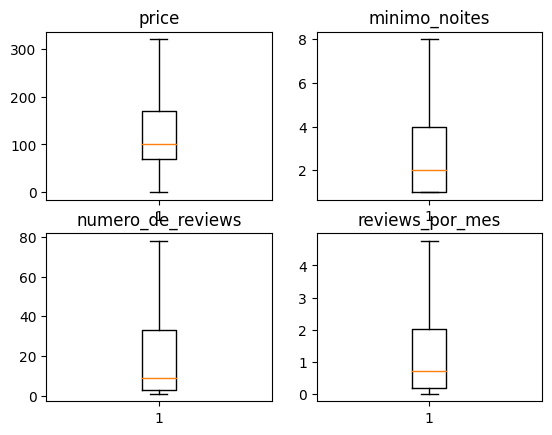

In [7]:
# plot dos diagramas de caixas (boxplots)

data_set_precification =  data_set_precification.dropna() #remove os dados ausentes NaN
price = data_set_precification["price"].to_numpy()
minimo_noites = data_set_precification["minimo_noites"].to_numpy()
numero_de_reviews  = data_set_precification["numero_de_reviews"].to_numpy()
reviews_por_mes = data_set_precification["reviews_por_mes"].to_numpy()
disponibilidade_365 = data_set_precification["disponibilidade_365"].to_numpy()

dict_variaveis_quantitativas = {0: price, 1: minimo_noites, 2: numero_de_reviews, 3: reviews_por_mes}
list_variaveis_quantitativas = ["price", "minimo_noites", "numero_de_reviews", "reviews_por_mes"]

def plotarBoxPlots(dict_variaveis, list_variaveis):
  linhasSubPlot = int(len(dict_variaveis) / 2)
  contador = 0
  fig, axs = plt.subplots(linhasSubPlot, 2)
  for i in range(linhasSubPlot):
    for j in range(2):
      axs[i, j].boxplot(dict_variaveis[contador],  0, '')
      axs[i, j].set_title(list_variaveis[contador])

      contador+=1
  plt.show()

plotarBoxPlots(dict_variaveis_quantitativas, list_variaveis_quantitativas)

### Correlação entre as variáveis quantitativas



*   Nos gráficos apresentados é possivel notar na diagonal principal a distribuição dos dados do mesmo modo como é possível perceber nos Diagramas de Caixa.
*   É possível perceber que o preço parece ter uma relação de curva exponencial negativa em relação às outras variáveis.



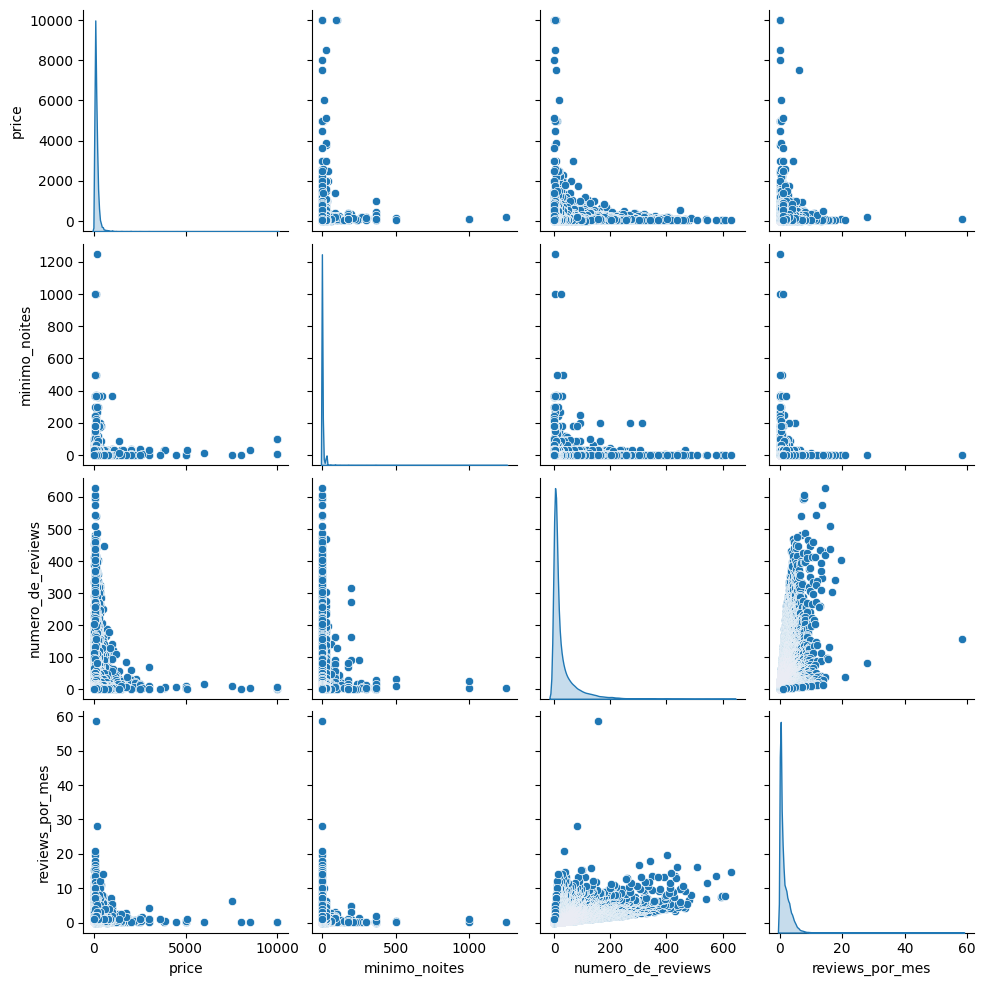

In [8]:
# ScatterPlot das variáveis quantitativas de modo a perceber se existe correlação entre elas

sns.pairplot(data_set_precification[["price", "minimo_noites", "numero_de_reviews", "reviews_por_mes"]], diag_kind="kde")

### Agrupando os preços com as variáveis categóricas



*   É possível notar que no conjunto de dados, a soma dos valores de Acomodação Inteira e dos imóveis localizados na Ilha de Manhatam possuem a maior soma de preços.
*   Quartos compartilhados e imoveis localizados em Staten Island tem a somas totais mais baixas.




In [9]:
# Agrupando os preços com as variáveis categóricas

precificacao_bairro =  data_set_precification.groupby('bairro_group')['price'].sum().sort_values(ascending=False)
precificacao_tipo_quarto =  data_set_precification.groupby('room_type')['price'].sum().sort_values(ascending=False)
print(precificacao_tipo_quarto.to_dict())
print(precificacao_bairro.to_dict())

{'Entire home/apt': 3989336, 'Private room': 1482527, 'Shared room': 53479}
{'Manhattan': 2992970, 'Brooklyn': 1996586, 'Queens': 437923, 'Bronx': 69614, 'Staten Island': 28249}


In [10]:
# transformando as variáveis categóricas na codificação one hot

data_set_precification_encoded = pd.get_dummies(data_set_precification['bairro_group'])
data_set_precification = pd.concat([data_set_precification, data_set_precification_encoded], axis=1)
data_set_precification_encoded = pd.get_dummies(data_set_precification['room_type'])
data_set_precification = pd.concat([data_set_precification, data_set_precification_encoded], axis=1)
data_set_precification.head()



,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,...,calculado_host_listings_count,disponibilidade_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2,355,0,0,1,0,0,1,0,0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,1,194,0,1,0,0,0,1,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,1,0,0,0,1,0,0,1,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,1,129,0,0,1,0,0,1,0,0
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,1,0,0,1,0,0,0,0,1,0


In [11]:
#começando a elaboração do modelo de Rede Neural Artificial (ANN)

train_dataset = data_set_precification.sample(frac=0.8,random_state=0) #separando os dados em treino e teste
train_dataset = train_dataset.drop(columns=["id",	"nome", "host_id", "host_name", "bairro", "bairro_group",
                                            "latitude",	"longitude", "room_type", "ultima_review",
                                            "calculado_host_listings_count"])
test_dataset = data_set_precification.drop(train_dataset.index)
test_dataset = test_dataset.drop(columns=["id",	"nome", "host_id", "host_name", "bairro", "bairro_group",
                                            "latitude",	"longitude", "room_type", "ultima_review",
                                            "calculado_host_listings_count"])
test_dataset.head()

,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
11,89,4,167,1.34,314,0,1,0,0,0,0,1,0
12,85,2,113,0.91,333,0,0,1,0,0,0,1,0
14,140,2,148,1.20,46,0,1,0,0,0,1,0,0
21,80,1,39,0.37,364,0,1,0,0,0,0,1,0
23,120,2,88,0.73,233,0,1,0,0,0,1,0,0


In [12]:
train_labels = train_dataset.pop("price")
test_labels = test_dataset.pop("price")



In [13]:
train_labels = np.log(train_labels)
test_labels = np.log(test_labels)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
test_labels

11       4.488636
12       4.442651
14       4.941642
21       4.382027
23       4.787492
           ...   
48379    4.595120
48383    4.867534
48403    4.510860
48453    4.787492
48798    5.459586
Name: price, Length: 7764, dtype: float64

In [15]:
# Normalização dos dados
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()



In [16]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


In [17]:
normed_test_data

,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
11,-0.105536,2.858202,-0.020761,1.534370,-0.149167,1.163279,-0.864264,-0.366011,-0.087318,-1.049034,1.095738,-0.148828
12,-0.216418,1.737313,-0.274615,1.680877,-0.149167,-0.859611,1.157017,-0.366011,-0.087318,-1.049034,1.095738,-0.148828
14,-0.216418,2.463815,-0.103411,-0.532148,-0.149167,1.163279,-0.864264,-0.366011,-0.087318,0.953227,-0.912598,-0.148828
21,-0.271859,0.201281,-0.593407,1.919915,-0.149167,1.163279,-0.864264,-0.366011,-0.087318,-1.049034,1.095738,-0.148828
23,-0.216418,1.218384,-0.380879,0.909788,-0.149167,1.163279,-0.864264,-0.366011,-0.087318,0.953227,-0.912598,-0.148828
...,...,...,...,...,...,...,...,...,...,...,...,...
48379,-0.271859,-0.587492,-0.221483,0.362315,-0.149167,-0.859611,-0.864264,2.732067,-0.087318,0.953227,-0.912598,-0.148828
48383,0.005347,-0.587492,-0.221483,-0.663233,-0.149167,1.163279,-0.864264,-0.366011,-0.087318,-1.049034,1.095738,-0.148828
48403,-0.216418,-0.587492,-0.221483,1.765697,-0.149167,1.163279,-0.864264,-0.366011,-0.087318,-1.049034,1.095738,-0.148828
48453,-0.271859,-0.587492,-0.221483,1.873649,-0.149167,-0.859611,1.157017,-0.366011,-0.087318,-1.049034,1.095738,-0.148828


In [18]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [19]:
model = build_model()

In [20]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

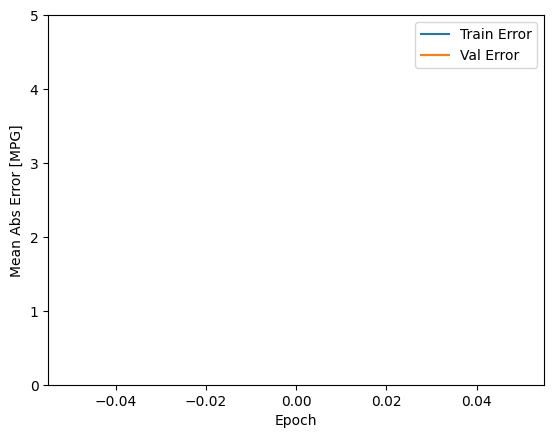

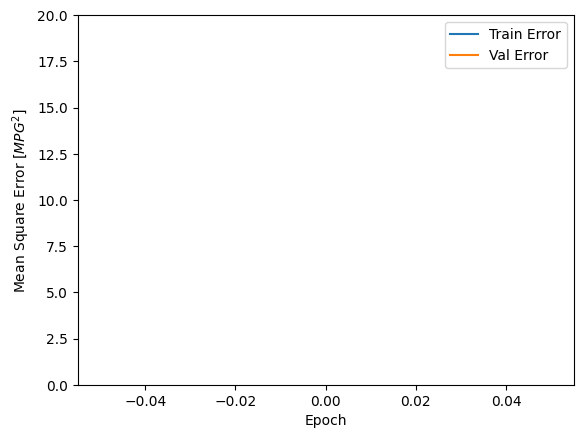

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


..........

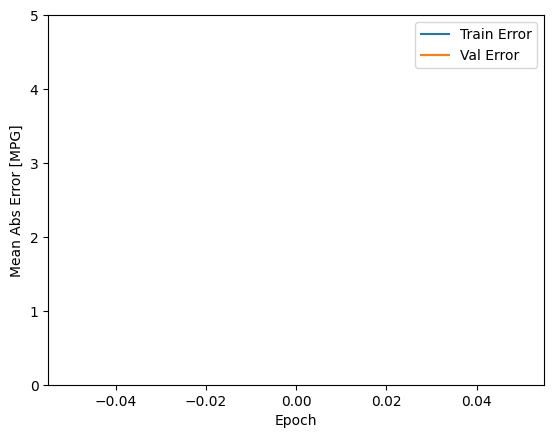

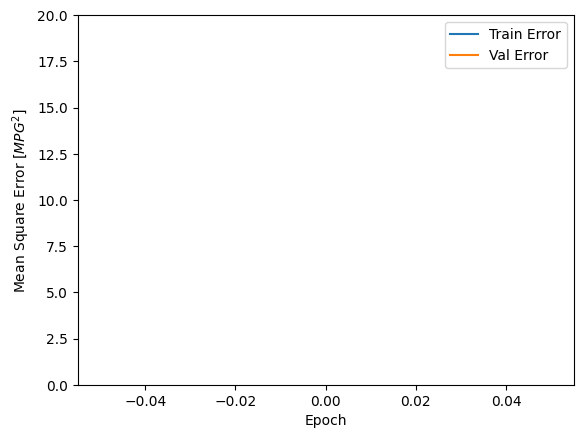

In [22]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

243/243 - 0s - loss: nan - mae: nan - mse: nan - 292ms/epoch - 1ms/step
Testing set Mean Abs Error:   nan MPG


243/243 [==============================] - 0s 1ms/step


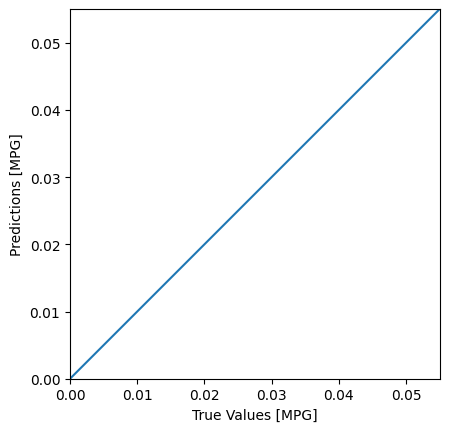

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

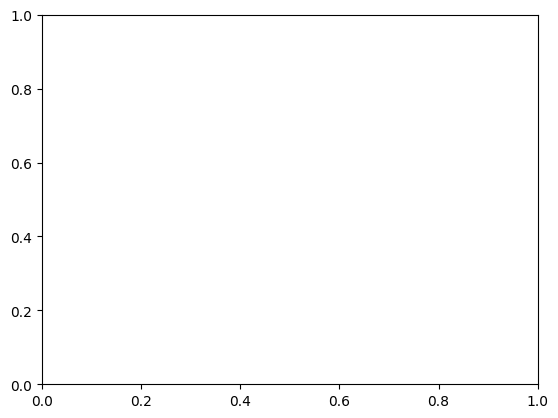

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")